In [26]:
import json
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [27]:
%matplotlib notebook

## Examine json file downloaded from https://pubchem.ncbi.nlm.nih.gov/compound/101411753#section=3D-Conformer

In [3]:
totapol_json_file = 'Conformer3D_CID_101411753.json'

In [4]:
with open(totapol_json_file, 'r', encoding='utf-8') as f:
    totapol_js = json.load(f)

In [8]:
totapol_js.keys()

dict_keys(['PC_Compounds'])

In [11]:
len(totapol_js['PC_Compounds'])

1

In [12]:
totapol_js['PC_Compounds'][0].keys()

dict_keys(['id', 'atoms', 'bonds', 'stereo', 'coords', 'props', 'count'])

In [13]:
totapol_js = totapol_js['PC_Compounds'][0]

In [44]:
totapol_js['id']

{'id': {'cid': 101411753}}

In [31]:
totapol_js['atoms'].keys()

dict_keys(['aid', 'element', 'charge'])

In [33]:
# H, C, N, O
np.unique(totapol_js['atoms']['element'])

array([1, 6, 7, 8])

In [17]:
len(totapol_js['coords'])

1

In [18]:
coords = totapol_js['coords'][0]

In [19]:
coords.keys()

dict_keys(['type', 'aid', 'conformers', 'data'])

In [22]:
len(coords['conformers'])

1

In [23]:
coords['conformers'][0].keys()

dict_keys(['x', 'y', 'z', 'data'])

In [24]:
x = coords['conformers'][0]['x']
y = coords['conformers'][0]['y']
z = coords['conformers'][0]['z']

In [39]:
totapol_js['bonds'].keys()

dict_keys(['aid1', 'aid2', 'order'])

In [45]:
aid1 = totapol_js['bonds']['aid1']
aid2 = totapol_js['bonds']['aid2']

In [51]:
bonds = []
for atom1, atom2 in zip(aid1, aid2):
    temp_x = [x[atom1-1], x[atom2-1]]
    temp_y = [y[atom1-1], y[atom2-1]]
    temp_z = [z[atom1-1], z[atom2-1]]
    bonds.append([temp_x, temp_y, temp_z])

In [54]:
color_identities = {
    1: '#C0C0C0',
    6: '#778899',
    7: '#0000FF',
    8: '#FF0000'
}

In [55]:
colors = [color_identities[i] for i in totapol_js['atoms']['element']]

<IPython.core.display.Javascript object>


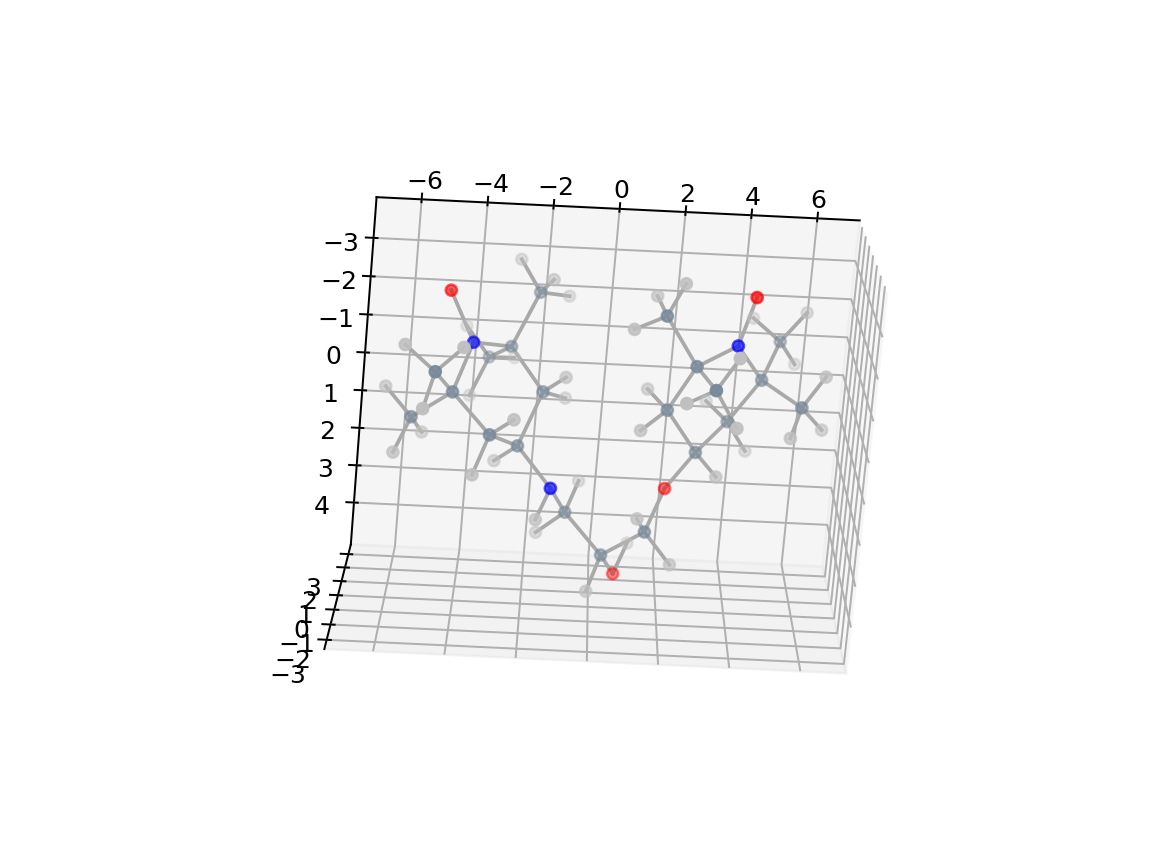

In [57]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, marker='o', c=colors)
for bond in bonds:
    temp_x, temp_y, temp_z = bond
    ax.plot(temp_x, temp_y, temp_z, c='#A9A9A9')
plt.show()

In [69]:
# select the two CO bonds
elements = totapol_js['atoms']['element']
bonds_selected = []
elements_selected = []

for atom1, atom2 in zip(aid1, aid2):
    two_elements = [elements[atom1-1], elements[atom2-1]]
    two_elements = sorted(two_elements)
    if two_elements == [7,8]:
        temp_x = [x[atom1-1], x[atom2-1]]
        temp_y = [y[atom1-1], y[atom2-1]]
        temp_z = [z[atom1-1], z[atom2-1]]
        bonds_selected.append([temp_x, temp_y, temp_z])
        elements_selected += two_elements
        
x_selected, y_selected, z_selected = [], [], []
for temp_xs, temp_ys, temp_zs in bonds_selected:
    x_selected += temp_xs
    y_selected += temp_ys
    z_selected += temp_zs
    
colors_selected = [color_identities[i] for i in elements_selected]

In [70]:
bonds_selected

[[[-4.7671, -3.9931], [-2.5706, -1.3567], [0.5048, 0.282]],
 [[4.0645, 3.66], [-2.9075, -1.6918], [-0.11, -0.1322]]]

<IPython.core.display.Javascript object>


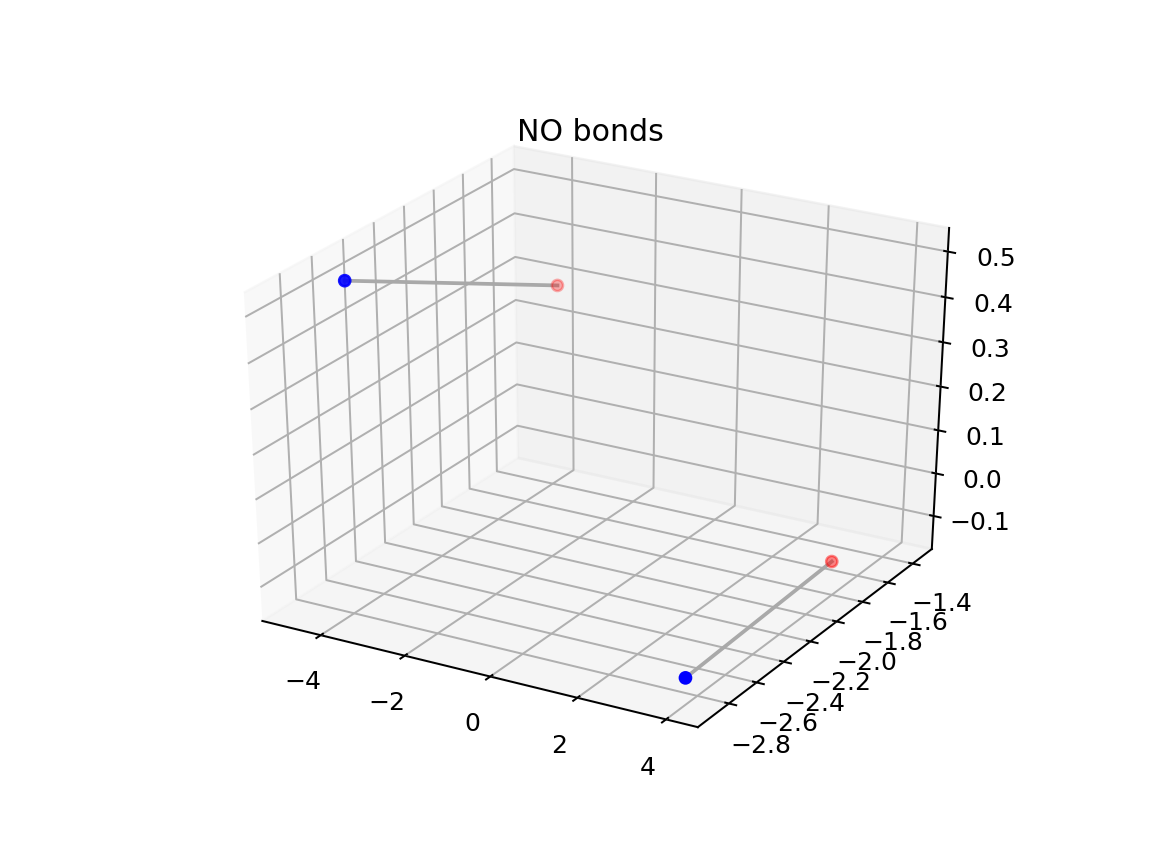

In [76]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_selected, y_selected, z_selected, marker='o', c=colors_selected)
for bond in bonds_selected:
    temp_x, temp_y, temp_z = bond
    ax.plot(temp_x, temp_y, temp_z, c='#A9A9A9')
plt.title('NO bonds')
plt.show()

### To get the angles between the two bonds

In [80]:
coords1 = np.array(bonds_selected[0])
coords2 = np.array(bonds_selected[1])

In [81]:
coords1.shape

(3, 2)

In [82]:
vec1 = coords1[:, 1] - coords1[:, 0]
vec1

array([ 0.774 ,  1.2139, -0.2228])

In [84]:
vec2 = coords2[:, 1] - coords2[:, 0]
vec2

array([-0.4045,  1.2157, -0.0222])

In [86]:
vec1to2 = vec2 - vec1
vec1to2

array([-1.1785,  0.0018,  0.2006])

In [95]:
a = np.sqrt(np.sum(vec1**2))
b = np.sqrt(np.sum(vec2**2))
c = np.sqrt(np.sum(vec1to2**2))

In [96]:
theta = np.arccos((a**2 + b**2 - c**2)/(2*a*b))

In [98]:
theta * 180.0/np.pi

51.28372115899322